<a href="https://colab.research.google.com/github/Geracruz/projects_portfolio/blob/main/proyecto_sequia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ----------------------------------------------------------
## Remplazar estas librerias cuando se importe MLUtils
import sklearn.cluster as cluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ----------------------------------------------------------
from keras.models import Sequential
from keras.layers import Dense


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/alondraSanchezM/sequias-en-Mexico-y-agricultura/main/Datasets/Data_Proyecto_clean.csv")
df.head()

,Entidad,Fecha,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA
0,Aguascalientes,2002-11-01,18.000000,19.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Aguascalientes,2002-12-01,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Aguascalientes,2003-01-01,12.743166,4.9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Aguascalientes,2003-02-01,15.105630,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,Aguascalientes,2003-03-01,16.570585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.482667


In [3]:
df.isna().sum()

Entidad                          0
Fecha                            0
Temperatura                      0
Precipitacion                    0
D0                               0
D1                               0
D2                               0
D3                               0
D4                               0
Area_total_afectada_sequias      0
IEA                            249
dtype: int64

In [4]:
df = df.dropna( )

In [5]:
df.dtypes

Entidad                         object
Fecha                           object
Temperatura                    float64
Precipitacion                  float64
D0                             float64
D1                             float64
D2                             float64
D3                             float64
D4                             float64
Area_total_afectada_sequias    float64
IEA                            float64
dtype: object

In [6]:
df['Fecha']=df['Fecha'].astype('datetime64[ns]')
df['Mes']= df['Fecha'].dt.month
df['Año']= df['Fecha'].dt.year
df=df.drop(columns='Fecha' )



In [7]:
df.loc[:, 'Entidad'] = df['Entidad'].astype('category')
df_dummy = pd.get_dummies(df.copy(), columns=['Entidad'])


In [8]:
df.dtypes

Entidad                        category
Temperatura                     float64
Precipitacion                   float64
D0                              float64
D1                              float64
D2                              float64
D3                              float64
D4                              float64
Area_total_afectada_sequias     float64
IEA                             float64
Mes                               int64
Año                               int64
dtype: object

**Regresión lineal múltiple con todas las variables**

In [9]:
x=df_dummy.drop(columns="Area_total_afectada_sequias")
y=df_dummy["Area_total_afectada_sequias"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [10]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))


Entrenamiento: MSE =136.00060038356938
Entrenamiento: R^2 =0.9078740030153003
Pruebas: MSE =111.40195025314863
Entrenamiento: R^2 =0.9196422159365801


In [11]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,52.18,50.826202
1,84.59,81.162079
2,13.86,13.206177
3,40.13,39.874298
4,96.45,94.752167
5,16.46,20.884094
6,100.00,97.635986
7,50.71,53.480896
8,99.53,98.557983
9,100.00,103.597382


**Regresión polinómica múltiple**

In [12]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=2)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =113.26780121264092
Entrenamiento: R^2 =0.9232730658280242
Pruebas: MSE =107.31429423040382
Entrenamiento: R^2 =0.9225907727549738


,valor_real,prediccion,diferencia
0,52.18,51.333804,0.846196
1,84.59,87.211773,-2.621773
2,13.86,10.813398,3.046602
3,40.13,41.075004,-0.945004
4,96.45,91.893514,4.556486
5,16.46,24.214744,-7.754744
6,100.00,95.646718,4.353282
7,50.71,49.435004,1.274996
8,99.53,98.015442,1.514558
9,100.00,89.515331,10.484669


Predecir unico

In [13]:
datos = {
    'Entidad' : [1, 3, 5],
    'Temperatura': [21.2, 22, 17],
    'Precipitacion': [25.20, 12.3,0]
}

prediccion = pd.DataFrame(datos)
print(prediccion)

   Entidad  Temperatura  Precipitacion
0        1         21.2           25.2
1        3         22.0           12.3
2        5         17.0            0.0


In [14]:
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =72.46725977157371
Entrenamiento: R^2 =0.9509111096835128
Pruebas: MSE =4729988.735172874
Entrenamiento: R^2 =-3410.8919151748632


,valor_real,prediccion,diferencia
0,52.18,56.850462,-4.670462
1,84.59,81.806233,2.783767
2,13.86,14.527196,-0.667196
3,40.13,35.556685,4.573315
4,96.45,106.112019,-9.662019
5,16.46,24.772641,-8.312641
6,100.00,-32672.216043,32772.216043
7,50.71,40.899708,9.810292
8,99.53,96.114205,3.415795
9,100.00,92.662060,7.337940


**No usar**

**Árbol de decisión regresor**

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
arbol=regressor.fit(X_train, Y_train)
#cross_val_score(regressor, x, y, cv=10)


y_train_predict = arbol.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = arbol.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.0
Entrenamiento: R^2 =1.0
Pruebas: MSE =14.125204335260117
Entrenamiento: R^2 =0.9898110390595031


,valor_real,prediccion,diferencia
0,52.18,50.80,1.38
1,84.59,84.28,0.31
2,13.86,13.93,-0.07
3,40.13,32.78,7.35
4,96.45,90.66,5.79
5,16.46,16.39,0.07
6,100.00,100.00,0.00
7,50.71,50.50,0.21
8,99.53,98.73,0.80
9,100.00,100.00,0.00


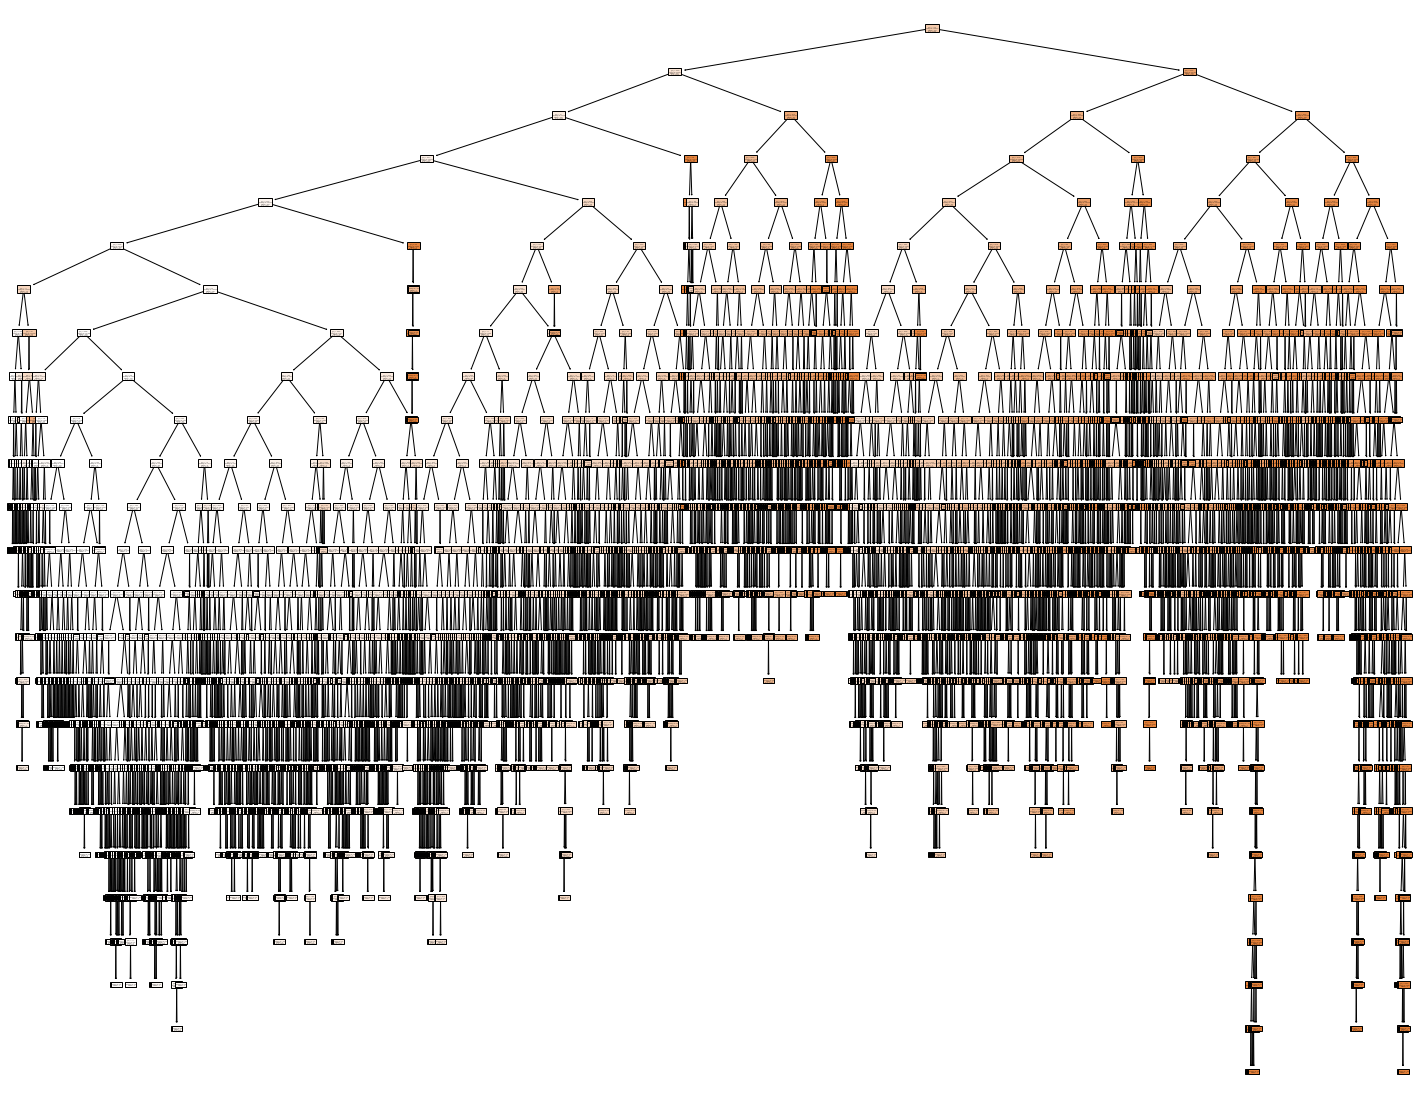

In [16]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(arbol, filled=True)

**Random forest regresor**

In [17]:
from sklearn.ensemble import RandomForestRegressor as forest

bosque = forest(n_estimators = 1000, random_state = 0)
bosque.fit(X_train, Y_train)

y_train_predict = bosque.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_train,y_train_predict)))

y_test_predict = bosque.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))
print("Entrenamiento: R^2 ="+str(r2_score(Y_test,y_test_predict)))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =1.0473668193680872
Entrenamiento: R^2 =0.9992905199523322
Pruebas: MSE =6.7386978402470765
Entrenamiento: R^2 =0.9951391620641766


,valor_real,prediccion,diferencia
0,52.18,54.07451,-1.89451
1,84.59,82.69866,1.89134
2,13.86,13.98340,-0.12340
3,40.13,39.51213,0.61787
4,96.45,92.04093,4.40907
5,16.46,17.06033,-0.60033
6,100.00,97.84284,2.15716
7,50.71,51.87739,-1.16739
8,99.53,98.96130,0.56870
9,100.00,97.84361,2.15639


In [18]:
df_predicciones=df_dummy.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
y_val=df_predicciones['Area_total_afectada_sequias']
x_val=df_predicciones.drop(columns='Area_total_afectada_sequias')

y_val_predict= bosque.predict(x_val)

In [19]:
df_resultados=df.loc[(df_dummy['Año']==2021) & (df_dummy['Mes']==6)]
df_resultados['Prediccion']=y_val_predict
df_resultados['Diferencia']=df_resultados['Area_total_afectada_sequias']-df_resultados['Prediccion']
df_resultados.head()

<ipython-input-19-bb2744996ff0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['Prediccion']=y_val_predict
<ipython-input-19-bb2744996ff0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['Diferencia']=df_resultados['Area_total_afectada_sequias']-df_resultados['Prediccion']


,Entidad,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA,Mes,Año,Prediccion,Diferencia
223,Aguascalientes,19.8,124.1,37.64,3.54,0.00,0.00,0.00,41.18,5.195000,6,2021,41.06362,0.11638
447,Baja California,24.4,0.2,0.43,48.43,51.14,0.00,0.00,100.00,58.889000,6,2021,99.73005,0.26995
895,Campeche,29.2,196.8,0.00,0.00,0.00,0.00,0.00,0.00,1.537000,6,2021,0.00000,0.00000
1119,Chiapas,26.0,319.2,0.00,0.00,0.00,0.00,0.00,0.00,0.149000,6,2021,0.00000,0.00000
1343,Chihuahua,26.5,61.6,26.06,28.40,22.55,14.09,1.51,92.60,20.300333,6,2021,91.67470,0.92530


In [20]:
df_resultados['Entidad'].unique()

['Aguascalientes', 'Baja California', 'Campeche', 'Chiapas', 'Chihuahua', ..., 'Tamaulipas', 'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']
Length: 31
Categories (32, object): ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', ...,
                          'Tlaxcala', 'Veracruz', 'Yucatan', 'Zacatecas']

In [21]:
nombres_nuevos = {
    "Yucatan": "Yucatán",
    "San Luis Potosi":"San Luis Potosí",
    "Queretaro":"Querétaro",
    "Nuevo Leon":"Nuevo León",
    "Michoacan":"Michoacán",
    "Ciudad De Mexico":"Ciudad de México",
    "Estado De Mexico":"México"
}
df_resultados['Entidad']=df_resultados['Entidad'].replace(nombres_nuevos)


<ipython-input-21-c6f6fe78e47e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resultados['Entidad']=df_resultados['Entidad'].replace(nombres_nuevos)


In [22]:
df_resultados.head()

,Entidad,Temperatura,Precipitacion,D0,D1,D2,D3,D4,Area_total_afectada_sequias,IEA,Mes,Año,Prediccion,Diferencia
223,Aguascalientes,19.8,124.1,37.64,3.54,0.00,0.00,0.00,41.18,5.195000,6,2021,41.06362,0.11638
447,Baja California,24.4,0.2,0.43,48.43,51.14,0.00,0.00,100.00,58.889000,6,2021,99.73005,0.26995
895,Campeche,29.2,196.8,0.00,0.00,0.00,0.00,0.00,0.00,1.537000,6,2021,0.00000,0.00000
1119,Chiapas,26.0,319.2,0.00,0.00,0.00,0.00,0.00,0.00,0.149000,6,2021,0.00000,0.00000
1343,Chihuahua,26.5,61.6,26.06,28.40,22.55,14.09,1.51,92.60,20.300333,6,2021,91.67470,0.92530


In [23]:
from urllib.request import urlopen
import json
with urlopen("https://raw.githubusercontent.com/angelnmara/geojson/master/mexicoHigh.json"
) as response:
    estados_mexico = json.load(response)



In [24]:
pip install plotly_express==0.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
pip install plotly==5.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [26]:
import plotly.graph_objects as go
fig = go.Figure(go.Choroplethmapbox(name='Mexico', geojson=estados_mexico, ids=df_resultados['Entidad'], z=df_resultados['Prediccion'],
                                locations=df_resultados['Entidad'], featureidkey='properties.name', colorscale='reds', 
                                colorbar_title = "Predicción Junio 2021",
                                text=df_resultados['Diferencia'], hoverinfo=["all"]))

fig.update_layout(mapbox_style='open-street-map',
                  mapbox_zoom=4, 
                  mapbox_center = {'lat': 25, 'lon': -99},
                  title_text = '2016 Presidential Election'
                  
              
                 )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [27]:
#Valor superior es valor predicho y el de abajo diferencia en la prediccion

**Redes neuronales**

In [28]:
# Definamos nuestra red neuronal con Keras

red_neuronal = Sequential()
red_neuronal.add(Dense(43, input_dim=42, activation="relu"))
red_neuronal.add(Dense(230000, activation="relu"))
red_neuronal.add(Dense(1, activation="sigmoid"))

In [29]:
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["mse"])

In [30]:
red_neuronal.fit(X_train,Y_train, epochs=100, batch_size= 2300)


Epoch 1/100
3/3 [==============================] - 42s 12s/step - loss: -57474.8789 - mse: 3151.3762
Epoch 2/100
3/3 [==============================] - 27s 6s/step - loss: -379687.9062 - mse: 3125.6619
Epoch 3/100
3/3 [==============================] - 20s 5s/step - loss: -969449.5625 - mse: 3125.6621
Epoch 4/100
3/3 [==============================] - 20s 5s/step - loss: -1889366.2500 - mse: 3125.6619
Epoch 5/100
3/3 [==============================] - 21s 6s/step - loss: -3199295.2500 - mse: 3125.6619
Epoch 6/100
3/3 [==============================] - 22s 7s/step - loss: -4979185.0000 - mse: 3125.6621
Epoch 7/100
3/3 [==============================] - 22s 8s/step - loss: -7275346.5000 - mse: 3125.6619
Epoch 8/100
3/3 [==============================] - 19s 7s/step - loss: -10181630.0000 - mse: 3125.6621
Epoch 9/100
3/3 [==============================] - 19s 6s/step - loss: -13825068.0000 - mse: 3125.6619
Epoch 10/100
3/3 [==============================] - 24s 7s/step - loss: -18296274.0

In [31]:
y_train_predict = red_neuronal.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = red_neuronal.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))



173/173 [==============================] - 6s 34ms/step
Entrenamiento: MSE =3125.6619118157187
44/44 [==============================] - 1s 26ms/step
Pruebas: MSE =3025.2296667630058


**MSV**

In [32]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, Y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [33]:
y_train_predict = regr.predict(X_train)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = regr.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =152.09485813640492
Pruebas: MSE =128.73166896150568


,valor_real,prediccion,diferencia
0,52.18,51.033095,1.146905
1,84.59,81.443054,3.146946
2,13.86,16.137309,-2.277309
3,40.13,37.273578,2.856422
4,96.45,92.219814,4.230186
5,16.46,18.930825,-2.470825
6,100.00,85.458750,14.541250
7,50.71,49.853820,0.856180
8,99.53,96.555962,2.974038
9,100.00,89.109605,10.890395
